<a href="https://colab.research.google.com/github/Saeed-upm/Data-Mining/blob/main/Data_Mining_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# مدل رگرسیون خطی


1.   **پیش بینی یک برونداد قبل از اتفاق افتادن آن**
2.   **لزوم داشتن داده‌های عددی**
1.   **تلاش برای یافتن یک ارتباط خطی بین دو متغیر**
2.   **یک متغیر به عنوان متغیر مستقل یا توضیحی و متغیر دیگر به عنوان متغیر وابسسته**


## پیش زمینه:

در مثال ارائه شده هدف یافتن ارتباط به قیمت‌های دو دارایی، یکی نفت  و دیگری سهام شرکت اکسون موبایل است.
**سوال اساسی این است که آیا قیمت سهام شرکت اکسون موبایل وابسگی به قیمت نفت دارد یا خیر؟**

***
یک مدل خطی بر فرم کلی زیر است:

$y = \beta_0 + \beta_1x$

که در آن:

- $y$ متغیر پاسخ، متغیر وابسته، برچسب، کلاس
- $x$ متغیر مستقل، صفت
- $\beta_0$ مقدار ثابت
- $\beta_1$ ضریب x

## وارد کردن کتابخانه‌های مورد نیاز


1. **Pandas** - جهت انجام عملیات روی داده‌ها
2. **Sklearn** - پیاده سازی دستورات یادگیری ماشین
3. **Scipy** - محاسبات ریاضی و آماری
4. **Matplotlib** - مصور سازی داده‌ها
1.   **google.colab** - دسترسی به فضای گوگل درایو



In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

***
## بارگذاری داده‌ها

In [ ]:
# load the data
#path =r"C:\Users\305197\OneDrive - Petco Animal Supplies\OneDrive-2019-03-29\oil_exxon.xlsx"
from google.colab import drive
drive.mount('/content/drive')
#path =r"C:\Users\Alex\OneDrive\Growth - Tutorial Videos\Lessons - Python\Python For Finance\oil_exxon.xlsx"
path='/content/drive/My Drive/Colab Notebooks/oil_exxon.xlsx'
price_data = pd.read_excel(path)

# set the index equal to the date column & then drop the old date column
price_data.index = pd.to_datetime(price_data['date'])
price_data = price_data.drop(['date'], axis = 1)

# print the first five rows
price_data.head()

Mounted at /content/drive


,exon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


***
## پایش داده‌ها


> 1. **بررسی نوع داده‌ها**
> 2. **بررسی عناوین ستون‌ها**
> 3. **داده‌های از دست رفته یا نامعلوم**

In [ ]:
# check the data types, in this case everything looks fine no changes need to be made.
price_data.dtypes

exon_price    float64
oil_price     float64
dtype: object

In [ ]:
# define the new name.
new_column_names = {'exon_price':'exxon_price'}#  {'exon_price':'exxon_price', 'oil_price':'oil' }

# rename the column
price_data = price_data.rename(columns = new_column_names)
price_data.head()

,exxon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


In [ ]:
oil = price_data['oil_price']
display(oil.isna().any())

True

In [ ]:
# check for missing values
display(price_data.isna().any())

# drop any missing values
price_data = price_data.dropna()

# let's check to make sure they've all been removed.
price_data.isna().any()

exxon_price    False
oil_price       True
dtype: bool

exxon_price    False
oil_price      False
dtype: bool

***
### ترسیم نقاط پراکنده جهت بررسی شهودی داده ها

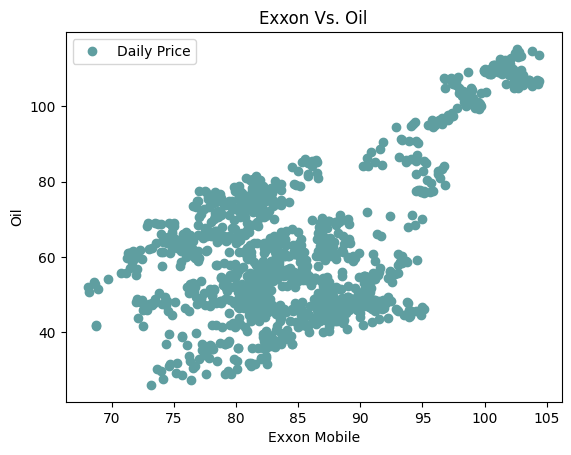

In [ ]:
# define the x & y data.
x = price_data['exxon_price']
y = price_data['oil_price']

# create the scatter plot.
plt.plot(x, y, 'o', color ='cadetblue', label = 'Daily Price')

# make sure it's formatted.
plt.title("Exxon Vs. Oil")
plt.xlabel("Exxon Mobile")
plt.ylabel("Oil")
plt.legend()

plt.show()

***
### محاسبه همبستگی‌ها

In [ ]:
# let's measure that correlation
price_data.corr()

,exxon_price,oil_price
exxon_price,1.00000,0.60132
oil_price,0.60132,1.00000


**تفسیر نتایج بدست آمده**

 - ارتباط بسیار قوی **(|r|>0.8 =>)**
 - ارتباط قوی **(0.6≤|r|)**
 - ارتباط متوسط **(0.4≤|r|)**
 - ارتباط ضعیف **(0.2≤|r|)**
 -ارتباط بسیار ضعیف **(|r|<0.2)**

***

## برخی شاخص‌های آماری

In [ ]:
# let's take a look at a statistical summary.
price_data.describe()

,exxon_price,oil_price
count,1248.000000,1248.000000
mean,84.802796,61.935000
std,7.424687,19.288424
min,68.120003,26.010000
25%,80.190002,48.162500
50%,83.024998,57.120000
75%,88.529999,70.725000
max,104.379997,115.190000


## بررسی احتمالی داده‌های پرت

$(\mu-3\sigma, \mu+3\sigma)$

***
### بررسی چولگی

array([[<Axes: title={'center': 'exxon_price'}>,
        <Axes: title={'center': 'oil_price'}>]], dtype=object)

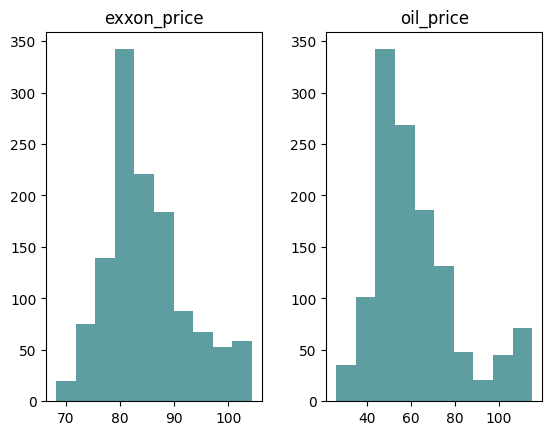

In [ ]:
price_data.hist(grid = False, color = 'cadetblue')

**استفاده از کتابخانه سای‌پای برای بررسی چولگی و کشیدگی**

In [ ]:
# calculate the excess kurtosis using the fisher method. The alternative is Pearson which calculates regular kurtosis.
exxon_kurtosis = kurtosis(price_data['exxon_price'], fisher = True)
oil_kurtosis = kurtosis(price_data['oil_price'], fisher = True)

# calculate the skewness
exxon_skew = skew(price_data['exxon_price'])
oil_skew = skew(price_data['oil_price'])

display("Exxon Excess Kurtosis: {:.2}".format(exxon_kurtosis))  # this looks fine
display("Oil Excess Kurtosis: {:.2}".format(oil_kurtosis))      # this looks fine

display("Exxon Skew: {:.2}".format(exxon_skew))          # moderately skewed
display("Oil Skew: {:.2}".format(oil_skew))              # moderately skewed, it's a little high but we will accept it.

'Exxon Excess Kurtosis: 0.088'

'Oil Excess Kurtosis: 0.53'

'Exxon Skew: 0.66'

'Oil Skew: 1.0'

***

$Kur(X)=E(\frac{X-\mu}{\sigma})^4$

**Kurtosis : کشیدگی**
-  **kurtosis ≈3 (excess ≈0)** is called mesokurtic (مزوکورتیک). This is a normal distribution
-  **kurtosis <3 (excess kurtosis <0)** is called platykurtic(پلاتیکورتیک).
-  **kurtosis >3 (excess kurtosis >0)** is called leptokurtic (لپتوکورتیک).

***

**Skewness: چولگی**
- If skewness is **less than −1 or greater than +1**, the distribution is highly skewed.
- If skewness is **between −1 and −½ or between +½ and +1**, the distribution is moderately skewed.
- If skewness is **between −½ and +½**, the distribution is approximately symmetric.

## ساخت مدل

***
### تقسیم بندی دیتا

In [ ]:
# define our input variable (X) & output variable.
Y = price_data.drop('oil_price', axis = 1)
X = price_data[['oil_price']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

***
### تعریف مدل و فیت کردن دیتا

In [ ]:
# create a Linear Regression model object.
regression_model = LinearRegression()

# pass through the X_train & y_train data set.
regression_model.fit(X_train, y_train)

LinearRegression()

***
### توصیف خروجی ها

In [ ]:
# let's grab the coefficient of our model and the intercept.
intercept = regression_model.intercept_[0]
coefficient = regression_model.coef_[0][0]

print("The Coefficient for our model is {:.2}".format(coefficient))
print("The intercept for our model is {:.4}".format(intercept))

The Coefficient for our model is 0.24
The intercept for our model is 70.01


***
### پیش بینی انفرادی

In [ ]:
# let's test a prediction
prediction = regression_model.predict([[600]])
predicted_value = prediction[0][0]
print("The predicted value is {:.4}".format(predicted_value))

The predicted value is 212.1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


***
### پیش بینی چندگانه

In [ ]:
print(X_test)

            oil_price
date                 
2017-08-29      51.64
2017-01-25      54.34
2017-06-02      48.46
2015-12-15      37.66
2015-03-06      59.15
...               ...
2016-03-16      38.38
2019-03-12      65.33
2018-07-18      70.52
2017-09-22      58.16
2018-03-28      68.13

[375 rows x 1 columns]


In [ ]:
# Get multiple predictions.
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[82.23530265],
       [82.87451035],
       [81.48245802],
       [78.9256272 ],
       [84.01324704]])